In [2]:
import nicci
import matplotlib.pyplot as plt

In [3]:
nicci.create_config('../default_config')

In [17]:
#LOAD THE CONFIG FILE
params=nicci.import_parameters('./config_file.par')

In [18]:
#BLANK THE MILKY WAY EMISSION
nicci.cubedo(write_fits=True,**params)

In [19]:
#REMOVE VOXEL IN THE MASK CORRESPONDING TO NEGATIVE DETECTIONS
nicci.fixmask(**params)

In [20]:
#RETRIEVE CUBE PROPERTIES
params=nicci.cubestat(params_dict=params,**params)

Noise statistic of the cube ngc2403_HI_cube_mwfilt.fits:
The median rms per channel is: 1.8e-04 Jy/beam
The 3σ 1-channel detection limit is: 5.3e-04 Jy/beam i.e., 1.2e+18 cm⁻²


The channel map will be plotted with the following parameters:
Spectral resolution: 5.3 km/s
Spatial resolution: 9.0 arcsec
Starting velocity: -272.1 km/s
Systemic velocity: 133.2 km/s
Beam: 52.4 x 49.1 arcsec
From pixel (0,0) to pixel (400,400)
From channel 28 to channel 79 every 2 channels
-------------------------------------------------
Contours level: ['2.0e+18', '4.5e+18', '1.0e+19', '2.3e+19', '5.0e+19', '1.1e+20'] cm⁻²


Channels plotted:   0%|          | 0/25 [00:00<?, ?it/s]

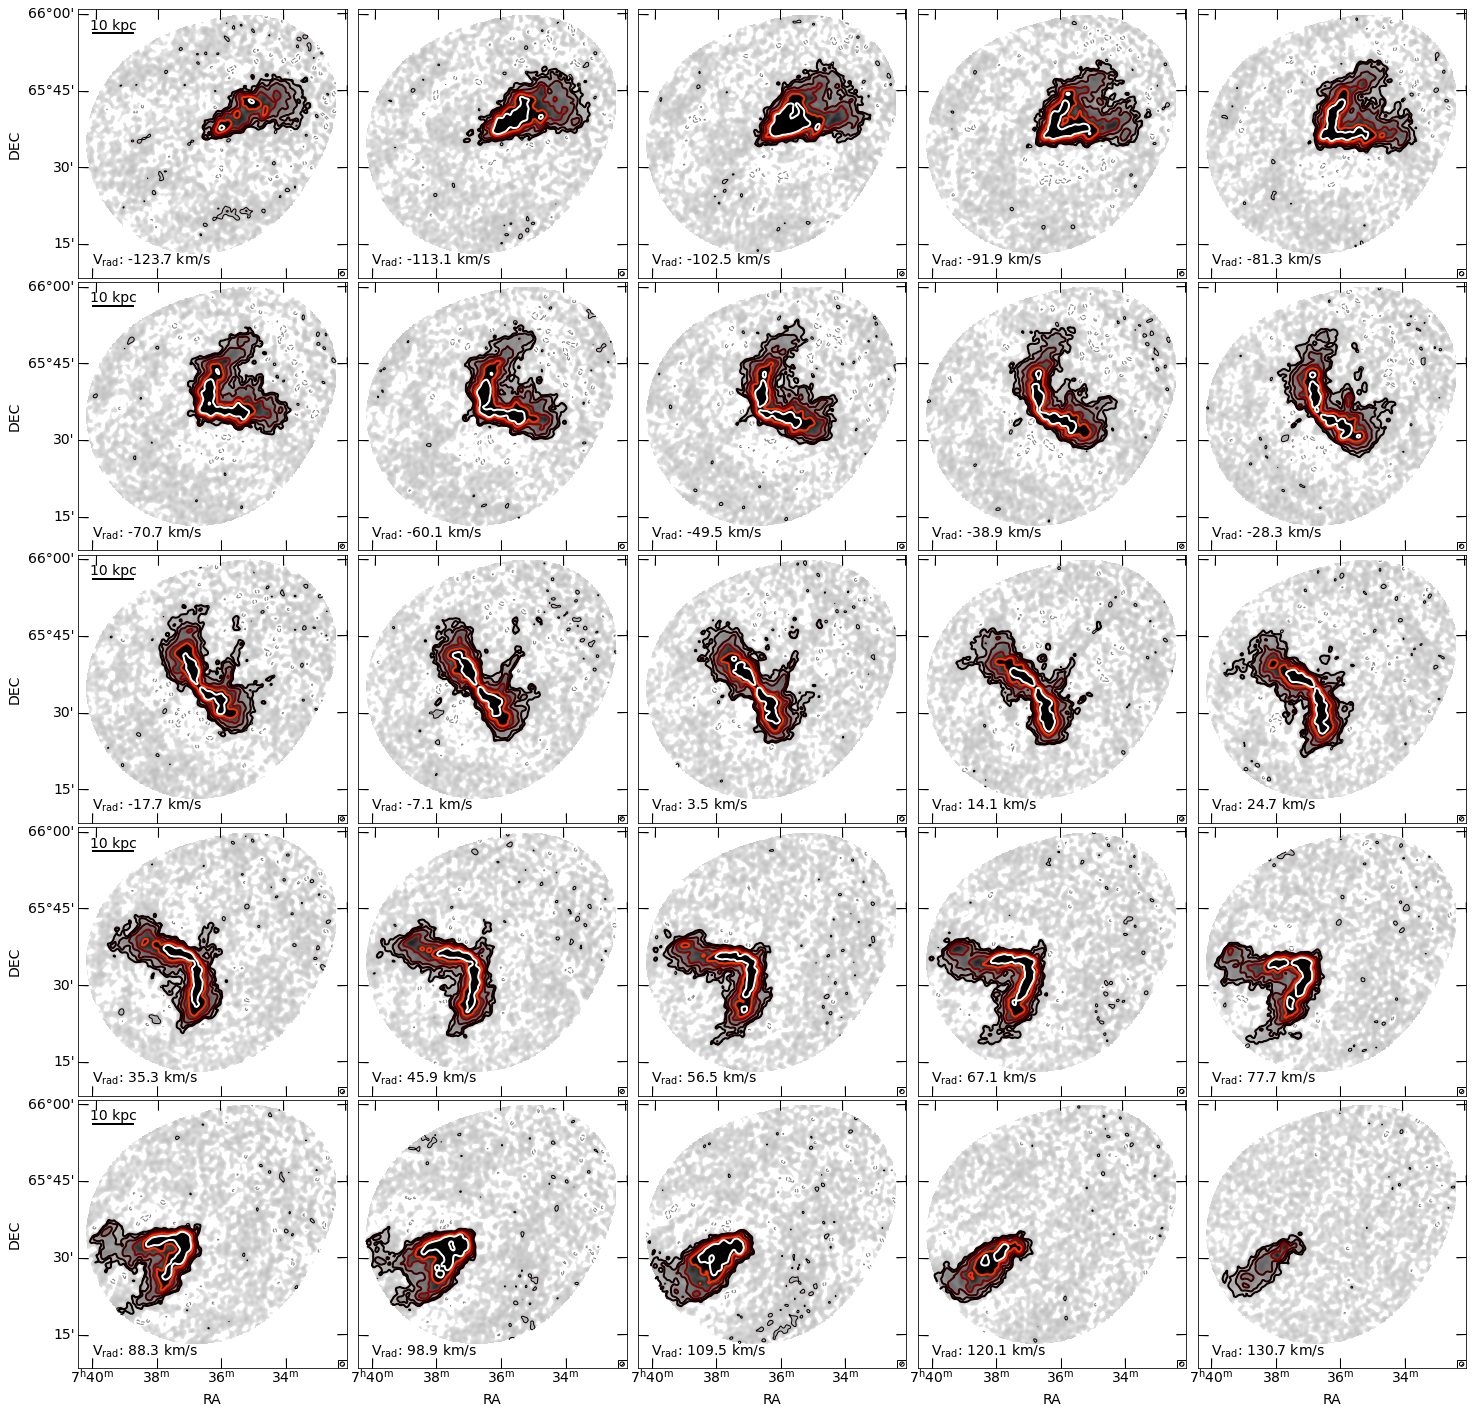

In [21]:
#DO THE CHANNEL MAPS
nicci.chanmap(**params)

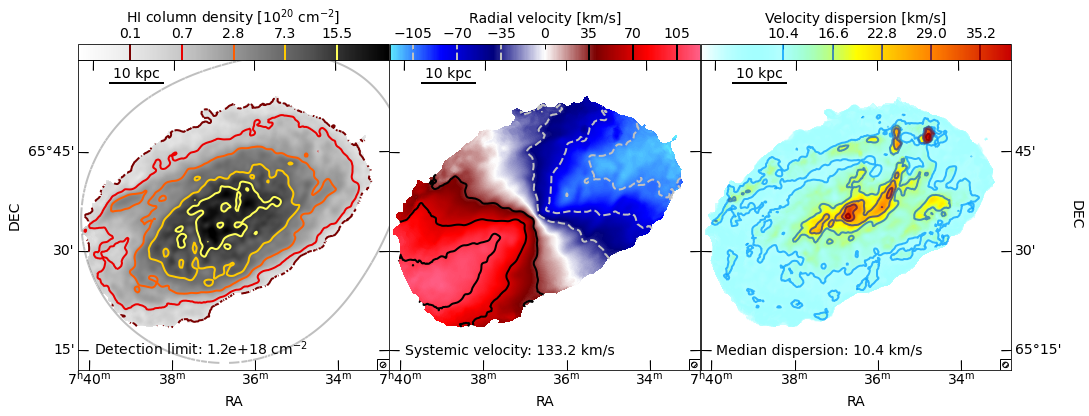

In [22]:
#PLOT THE MOMENT MAPS
nicci.plotmom(**params)

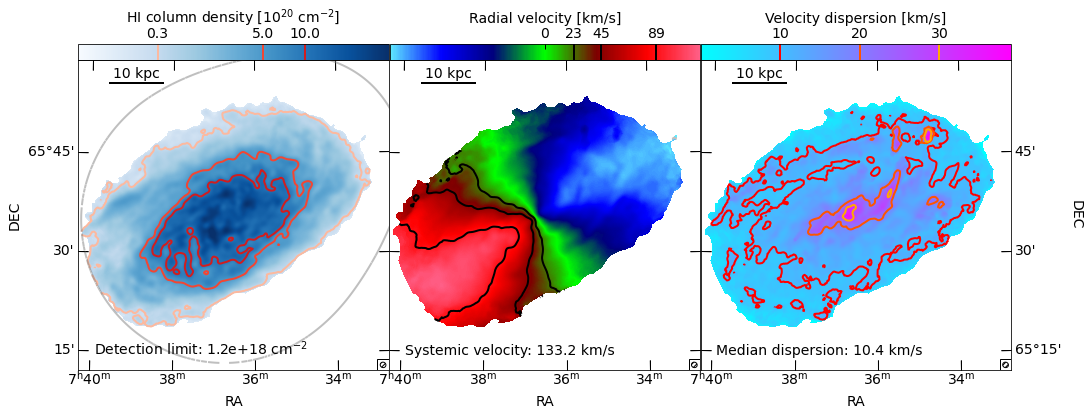

In [23]:
#ADVANCED USE: PLOT EACH OF THEM SEPARATELY
#this is just to show how to insert a moment map into a preexisting figure and play with aesthetics

ncols=3 #number of columns in the figure
nrows=1 #number of rows in the figure
fig=plt.figure(figsize=(6*ncols,6*nrows)) #create the figure

nicci.plotmom(which='mom0',position=131,mom0_ctr=[3e19,5e20,1e21],mom0_cmap='Blues',mom0_ctrmap='Reds',**params)
nicci.plotmom(which='mom1',position=132,mom1_ctr=[23,45,89],mom1_cmap='mom1_alt',mom1_ctrmap='Greys_r',**params)
ax=plt.gca() #access the current plot
ax.coords[1].set_ticklabel_visible(False) #move the y-axis label to the right
nicci.plotmom(which='mom2',position=133,mom2_ctr=[10,20,30,40],mom2_cmap='cool',mom2_ctrmap='autumn',**params)
ax=plt.gca() #access the current plot
ax.coords[1].set_ticklabel_position('r') #move the y-axis label to the right
ax.coords[1].set_axislabel_position('r') #move the y-axis tick labels to the right

fig.subplots_adjust(wspace=-0.185) #remove blank spaces between the subplots
fig.savefig('./ngc2403_HI_maps_2.pdf',dpi=300,bbox_inches='tight') #save the figure
plt.show()
plt.close(fig)

Extracting the pv slice with the following parameters:
Spatial resolution: 9.0 arcsec
Path length: 3715.2 arcsec
Path position angle: 304.5 deg deg
Path width: 52.4 arcsec
From channel 1 to channel 102
-------------------------------------------------

Contours level: [7.09292084e-04 1.13486733e-02 1.81578774e-01 2.90526038e+00
 4.64841660e+01] Jy/beam


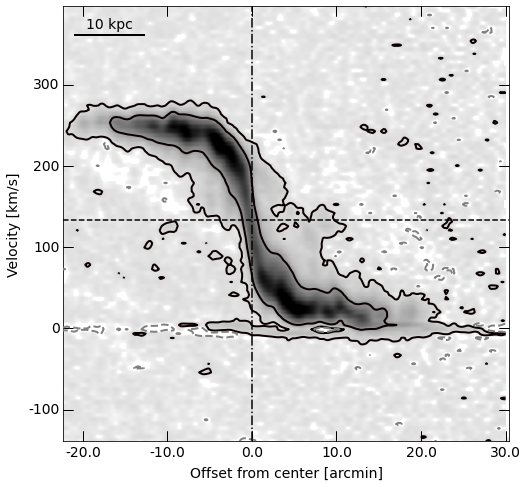

In [24]:
#EXTRACT THE POSITION-VELOCITY MAP ALONG THE MAJOR AXIS
nicci.getpv(write_fits=True,plot=True,saveplot=True,**params) #plot the pv along the major axis

Extracting the pv slice with the following parameters:
Spatial resolution: 9.0 arcsec
Path length: 3715.2 arcsec
Path position angle: 304.5 deg deg
Path width: 52.4 arcsec
From channel 1 to channel 102
-------------------------------------------------

Contours level: [0.00070929 0.00283717 0.01134867 0.04539469] Jy/beam
Extracting the pv slice with the following parameters:
Spatial resolution: 9.0 arcsec
Path length: 3715.2 arcsec
Path position angle: 394.5 deg deg
Path width: 52.4 arcsec
From channel 1 to channel 102
-------------------------------------------------



Contours level: [0.00070929 0.00283717 0.01134867 0.04539469] Jy/beam


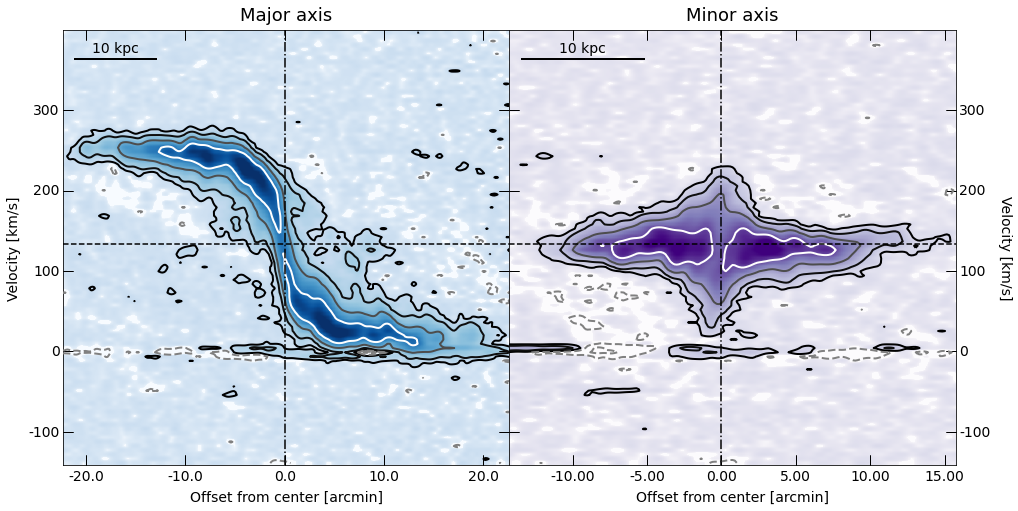

In [25]:
#ADVANCED USE: PLOT THE PV MAP ALONG THE MAJOR AND MINOR AXIS
#Use user-selected contour levels and colors

ncols=2 #number of columns in the figure
nrows=ncols//2 #number of rows in the figure
fig=plt.figure(figsize=(8*ncols,8*nrows)) #create the figure
subtitles=['Major axis','Minor axis'] #define the subtitles for each subplot

nicci.getpv(write_fits=True,plot=True,position=121,
             lim=[57,357,None,None],cmap='Blues',contours=[4,16,64,256],ctrmap='Greys_r',
             **params) #plot the pv along the major axis
ax=plt.gca() #access the current plot
ax.set_title(subtitles[0],pad=10,fontsize=18) #set the title

nicci.getpv(write_fits=True,plot=True,position=122,
             lim=[111,311,None,None],cmap='Purples',contours=[4,16,64,256],ctrmap='Greys_r',
             **{**params,'pvangle':params['pa']+90,'pv_out':'./ngc2403_HI_pv_minor'}) #plot the pv along the minor axis
ax=plt.gca() #access the current plot
ax.set_title(subtitles[1],pad=10,fontsize=18) #set the title
ax.coords[1].set_ticklabel_position('r') #move the y-axis label to the right
ax.coords[1].set_axislabel_position('r') #move the y-axis tick labels to the right

fig.subplots_adjust(wspace=0,hspace=0) #remove blank spaces between the subplots
fig.savefig('./ngc2403_HI_pv_both.pdf',dpi=300,bbox_inches='tight') #save the figure
plt.show()
plt.close(fig)

Calculating the rms spectral variation
----------------------------------------------


Channel processed:   0%|          | 0/102 [00:00<?, ?it/s]

Calculating the rms spatial variation
----------------------------------------------


Pixel processed:   0%|          | 0/160000 [00:00<?, ?it/s]

Writing the outputs
----------------------------------------------
Doing some fancy plots
----------------------------------------------


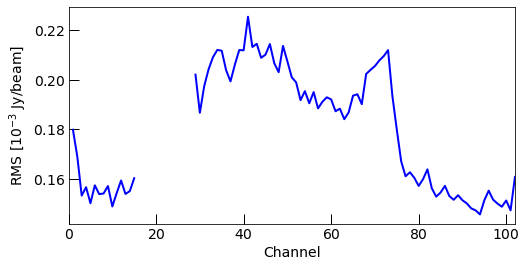

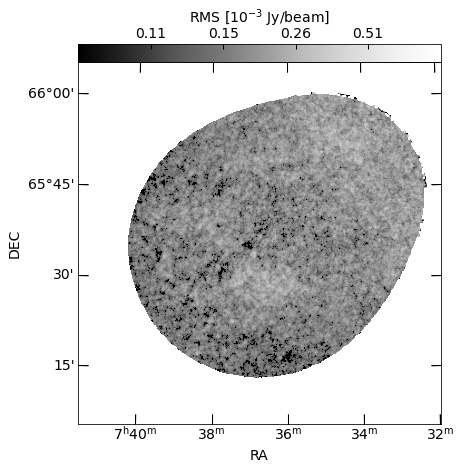

In [26]:
#SHOW HOW THE NOISE VARY SPATIALLY AND SPECTRALLY
nicci.noise_variations(**params)

In [ ]:
#PERFORM A SIMPLE SINGLE GAUSSIAN FIT
nicci.gaussfit(write_fits=True,**params)

Starting the Gaussian fit with the following parameters:
Spectral resolution: 5.299953171873001 km/s
Starting velocity: -138.93718760229999 km/s
First-guess FWHM: 15 km/s
Amplitude threshold: 0
p-value for rejection: 1


Spectra fitted:   0%|          | 0/44116 [00:00<?, ?it/s]

In [ ]:
#SUBTRACT THE GAUSSIAN MODEL FROM THE DATA
#we provide manually the model cube name as it was not in the parameter file
nicci.removemod(write_fits=True,**{**params,'modelcube':params['gauss_out']+'.fits'})

In [ ]:
#EXTRACT THE ROTATION CURVE
#nicci.rotcurve(**params)

In [ ]:
#EXTEND THE VELOCITY FIELD
#nicci.velfi(**params)

In [ ]:
#STACK TO RETRIEVE THE RADIAL PROFILE
#nicci.stacking()

In [ ]:
#STACK TO FIND LOW-LEVEL EMISSION AROUND THE GALAXY
#nicci.stacking()

In [ ]:
#RUN THE SOURCE FINDER ON A SET OF SPECTRA
#nicci.lines_finder()

# OTHER FUNCTIONALITIES

In [ ]:
#TRY THE OTHER CUBEDO TASKS
#THE write_fits ARGUMENT ALLOWS TO STORE THE RESULT IN FITS FILES, IF THE INPUT CUBE IS ALSO A FITS FILE

#blank a box in the first channel
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='blank',chanmin=1,chanmax=1,inbox=[200,300,200,300],write_fits=True,
              cubedo_out='./cubedo/ngc2403_HI_cube_blank.fits')

#clip the spectra above the 70% of their peak. For each spectra, all the values < 70% of the peak will be set to 0
#we run the clipping on the masked cube
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='clip',clipthreshold=0.7,write_fits=True,
              with_mask=True,cubedo_mask='./ngc2403_HI_mask_2d.fits',
              cubedo_out='./cubedo/ngc2403_HI_cube_clipped.fits')

#spatially crop the data cube to remove the blanked edges
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='crop',write_fits=True,
              cubedo_out='./cubedo/ngc2403_HI_cube_cropped.fits')

#extract a cubelet from channel 40 to channel 60 and from pixel (150,125) to pixel (250,275)
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='cut',chanmin=40,chanmax=60,inbox=[150,250,125,275],write_fits=True,
              cubedo_out='./cubedo/ngc2403_HI_cube_cut.fits')

#add 10 channels at the end of the spectral axis with values of 1
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='extend',addchan=10,value=1,write_fits=True,
              cubedo_out='./cubedo/ngc2403_HI_cube_extended.fits')

#mirror the data around the rotation point (x,y,z) = (200,200,40)
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='mirror',rot_center=[200,200,40],write_fits=True,
              cubedo_out='./cubedo/ngc2403_HI_cube_mirrored.fits')

#compute the moment 0 map from -22 km/s to 20 km/s (w.r.t. the systemic velocity) on the masked cube
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='mom0',chanmin=48,chanmax=56,write_fits=True,
              with_mask=True,cubedo_mask='./ngc2403_HI_mask.fits',
              cubedo_out='./cubedo/ngc2403_HI_cube_mom0.fits')

#shuffle the cube
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='shuffle',vfield='./ngc2403_HI_mom1.fits',write_fits=True,
              cubedo_out='./cubedo/ngc2403_HI_cube_shuffled.fits')

#convert the data cube into an integer cube
nicci.cubedo(cubedo='./ngc2403_HI_cube.fits',
              operation='toint',write_fits=True,
              cubedo_out='./cubedo/ngc2403_HI_cube_integer.fits')

In [ ]:
#BASIC MATH OPERATIONS ON FITS FILES
nicci.fitsarith(fits1='./ngc2403_HI_cube.fits',fits2='./ngc2403_HI_mask.fits',
                 do='sum',
                 fits_out='./fitsarith/ngc2403_HI_cube_mask_sum.fits')
nicci.fitsarith(fits1='./ngc2403_HI_cube.fits',fits2='./ngc2403_HI_mask.fits',
                 do='sub',
                 fits_out='./fitsarith/ngc2403_HI_cube_mask_sub.fits')
nicci.fitsarith(fits1='./ngc2403_HI_cube.fits',fits2='./ngc2403_HI_mask.fits',
                 do='mul',
                 fits_out='./fitsarith/ngc2403_HI_cube_mask_mul.fits')
nicci.fitsarith(fits1='./ngc2403_HI_cube.fits',fits2='./ngc2403_HI_mask.fits',
                 do='div',
                 fits_out='./fitsarith/ngc2403_HI_cube_mask_div.fits')

In [ ]:
#CALCULATE THE MOMENT 0 FLUX AND HI MASS ENCLOSED IN A GIVEN BOX
nicci.flux(params['mom0map'],
            fluxunits=params['fluxunits'],
            beamarea=1.13*params['bmaj']*params['bmin'],
            pixelres=params['pixelres'],
            pixunits=params['pixunits'],
            spectralres=params['spectralres'],
            specunits=params['specunits'],
            box=[200,300,200,300],verbose=True)
nicci.getHImass(params['mom0map'],beamcube='./'+params['beamcube'],
                 beamarea=1.13*params['bmaj']*params['bmin'],
                 pixelres=params['pixelres'],
                 pixunits=params['pixunits'],
                 pbcorr=params['pbcorr'],
                 distance=params['distance'],
                 box=[200,300,200,300],verbose=True)